In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2083
cast,1233
country,8996
date_added,9513
release_year,0
rating,337
duration,0


In [6]:
df.shape

(9668, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [8]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)

/tmp/ipython-input-8-1443205723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-8-1443205723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [9]:
df.drop(columns=['country', 'date_added'], inplace=True)

In [12]:
df.head()

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,Unknown,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,Unknown,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,Unknown,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,Unknown,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [15]:
sns.set_style('whitegrid')

/tmp/ipython-input-26-2926014748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


Text(0.5, 1.0, 'Movies vs TV Shows')

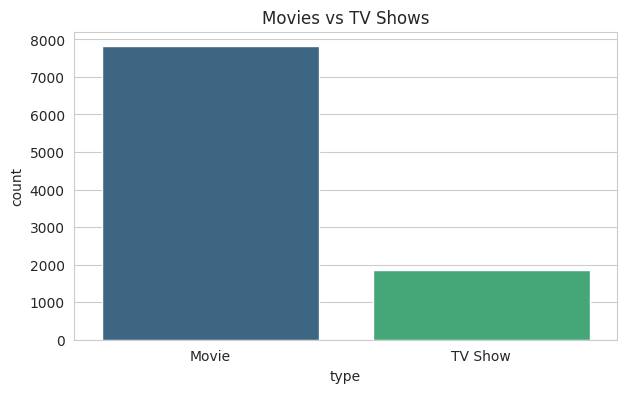

In [26]:
# 1. How many Movies versus TV Shows are there?
plt.figure(figsize=(7,4))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Movies vs TV Shows')

/tmp/ipython-input-27-805005974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=df, order=df['release_year'].value_counts().index[:10], palette='viridis')


Text(0.5, 1.0, 'Top 10 years with the most content released')

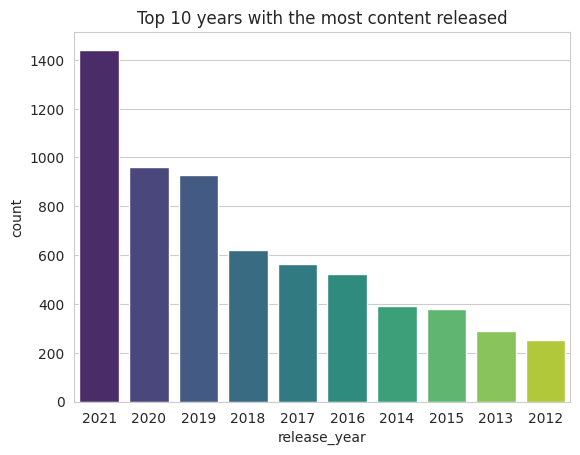

In [27]:
# 2. What are the top 10 years with the most content released?
sns.countplot(x='release_year', data=df, order=df['release_year'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 years with the most content released')

/tmp/ipython-input-33-3541873267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='mako')


Text(0.5, 1.0, 'Most common content ratings')

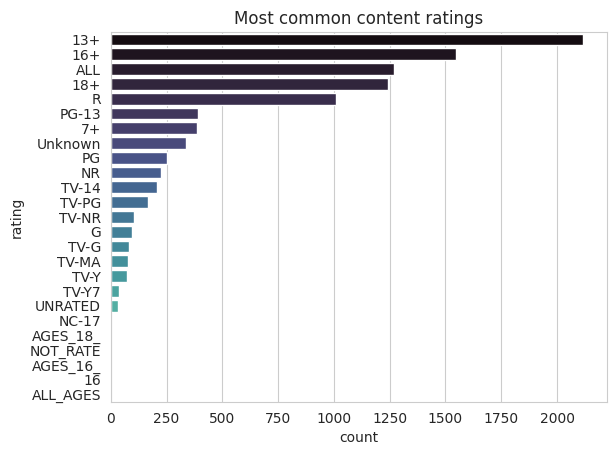

In [33]:
# 3. What are the most common content ratings?
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='mako')
plt.title('Most common content ratings')

In [34]:
# 4. What are the top 10 most popular genres?
df['listed_in']

,listed_in
0,"Comedy, Drama"
1,"Drama, International"
2,"Action, Drama, Suspense"
3,Documentary
4,"Drama, Fantasy"
...,...
9663,Comedy
9664,TV Shows
9665,Action
9666,"Drama, Sports"


/tmp/ipython-input-35-130264238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='listed_in', data=df, order=df['listed_in'].value_counts().index[:10], palette='viridis')


Text(0.5, 1.0, 'Top 10 most popular genres')

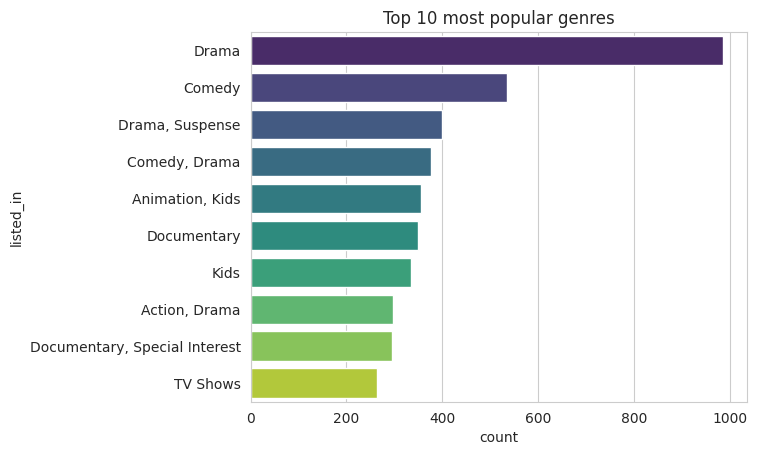

In [35]:
sns.countplot(y='listed_in', data=df, order=df['listed_in'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 most popular genres')